In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, log_loss, silhouette_score, mean_squared_error
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaseEnsemble, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import AgglomerativeClustering, KMeans
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv(r"..\Datasets\gdp-per-capita-ppp-constant-2011.csv")
df.head()

,Year,GDP_per_capita
0,1990,1754.857
1,1991,1737.615
2,1992,1796.532
3,1993,1845.149
4,1994,1930.113


In [7]:
y_gdp = df['GDP_per_capita']
y_trn_gdp = y_gdp[:-4]
y_tes_gdp = y_gdp[-4:]

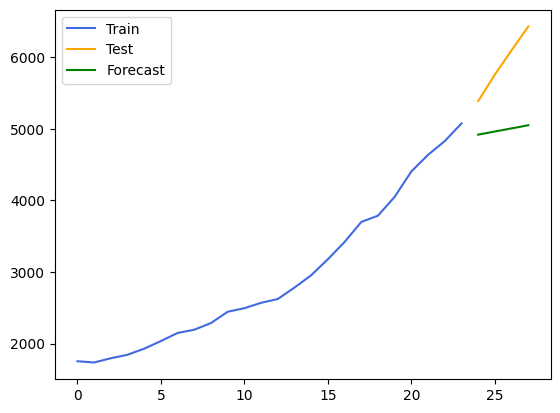

{'smoothing_level': 0.5, 'smoothing_trend': 0.02, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': -17.241999999999962, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
992.8436615509386


In [8]:
alpha = 0.5
beta = 0.02

from math import sqrt
from statsmodels.tsa.api import Holt

holt = Holt(y_trn_gdp)
fit1 = holt.fit(smoothing_level = alpha, smoothing_trend = beta)

fcast1 = fit1.forecast(len(y_tes_gdp))

y_trn_gdp.plot(color= 'royalblue', label = 'Train')
y_tes_gdp.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_tes_gdp, fcast1))
print(res)

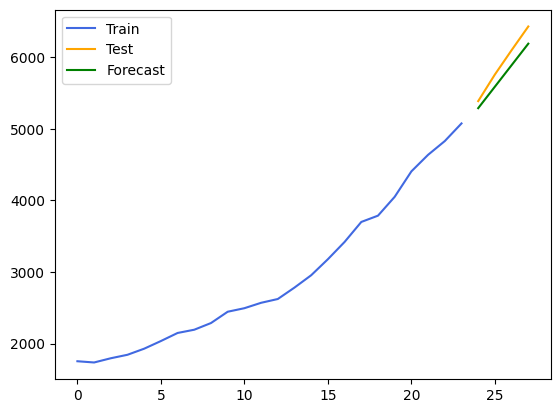

{'smoothing_level': 0.1, 'smoothing_trend': 1.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': -17.241999999999962, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
187.03954694001627


In [9]:
alpha = 0.1
beta = 1

from math import sqrt
from statsmodels.tsa.api import Holt

holt = Holt(y_trn_gdp)
fit1 = holt.fit(smoothing_level = alpha, smoothing_trend = beta)

fcast1 = fit1.forecast(len(y_tes_gdp))

y_trn_gdp.plot(color= 'royalblue', label = 'Train')
y_tes_gdp.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_tes_gdp, fcast1))
print(res)

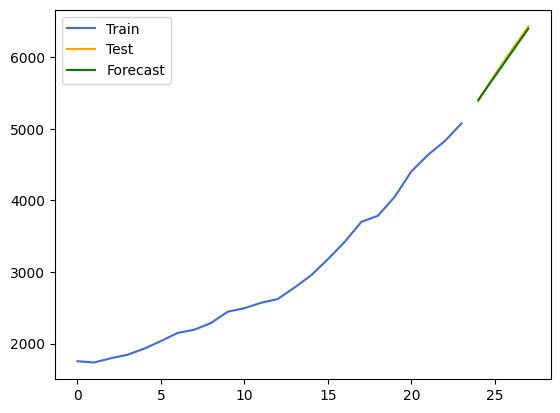

{'smoothing_level': 0.09, 'smoothing_trend': 1.5, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': -17.241999999999962, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
26.415895600885136


In [25]:
alpha = 0.09
beta = 1.5

from math import sqrt
from statsmodels.tsa.api import Holt

holt = Holt(y_trn_gdp)
fit1 = holt.fit(smoothing_level = alpha, smoothing_trend = beta)

fcast1 = fit1.forecast(len(y_tes_gdp))

y_trn_gdp.plot(color= 'royalblue', label = 'Train')
y_tes_gdp.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_tes_gdp, fcast1))
print(res)

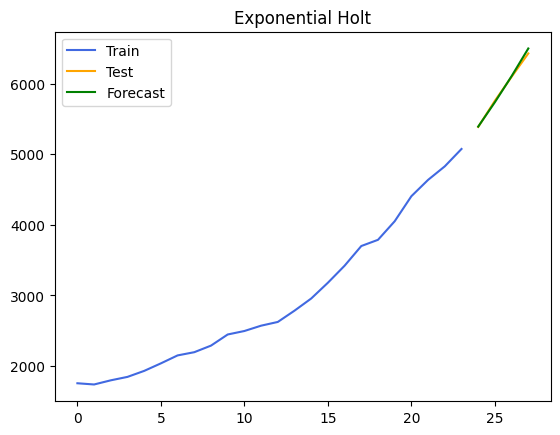

{'smoothing_level': 0.1, 'smoothing_trend': 1.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
36.92599315526218


In [27]:
alpha = 0.1
beta = 1

from math import sqrt
from statsmodels.tsa.api import Holt

holt = Holt(y_trn_gdp, exponential=True)
fit1 = holt.fit(smoothing_level = alpha, smoothing_trend = beta)

fcast1 = fit1.forecast(len(y_tes_gdp))

y_trn_gdp.plot(color= 'royalblue', label = 'Train')
y_tes_gdp.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')
plt.legend(loc = 'best')
plt.title('Exponential Holt')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_tes_gdp, fcast1))
print(res)

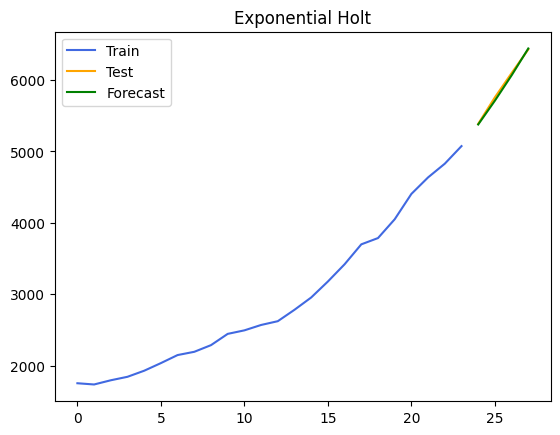

{'smoothing_level': 0.095, 'smoothing_trend': 1.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
29.469849627304107


In [30]:
alpha = 0.095
beta = 1

from math import sqrt
from statsmodels.tsa.api import Holt

holt = Holt(y_trn_gdp, exponential=True)
fit1 = holt.fit(smoothing_level = alpha, smoothing_trend = beta)

fcast1 = fit1.forecast(len(y_tes_gdp))

y_trn_gdp.plot(color= 'royalblue', label = 'Train')
y_tes_gdp.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')
plt.legend(loc = 'best')
plt.title('Exponential Holt')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_tes_gdp, fcast1))
print(res)

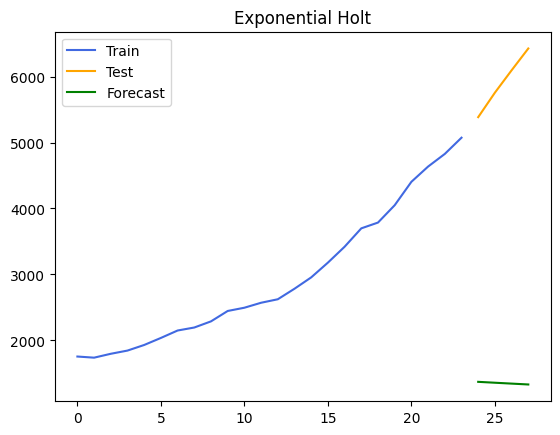

{'smoothing_level': 0.0, 'smoothing_trend': 0.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 4582.817030454718


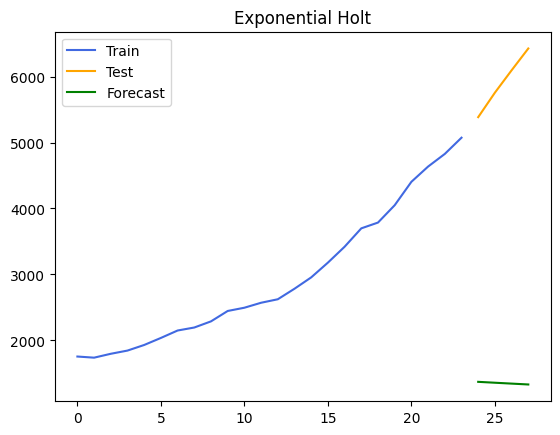

{'smoothing_level': 0.0, 'smoothing_trend': 0.1, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 4582.817030454718


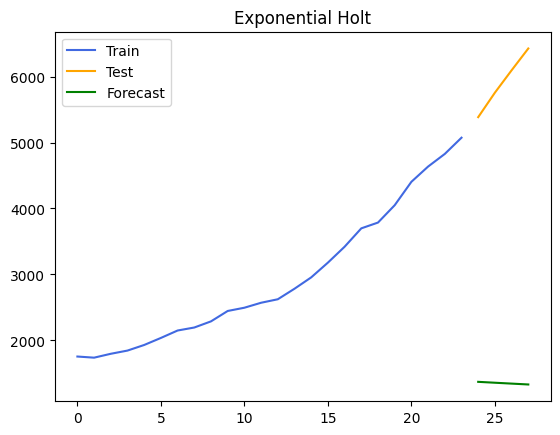

{'smoothing_level': 0.0, 'smoothing_trend': 0.2, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 4582.817030454712


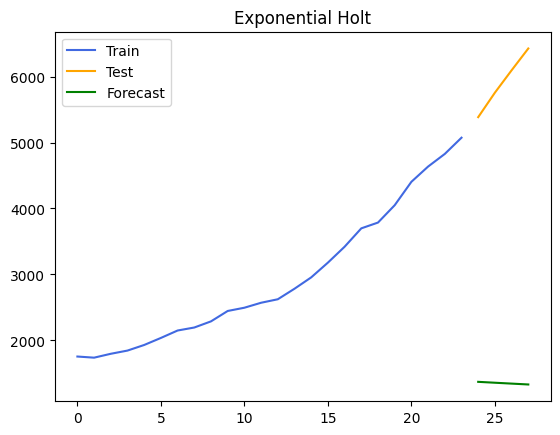

{'smoothing_level': 0.0, 'smoothing_trend': 0.30000000000000004, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 4582.817030454722


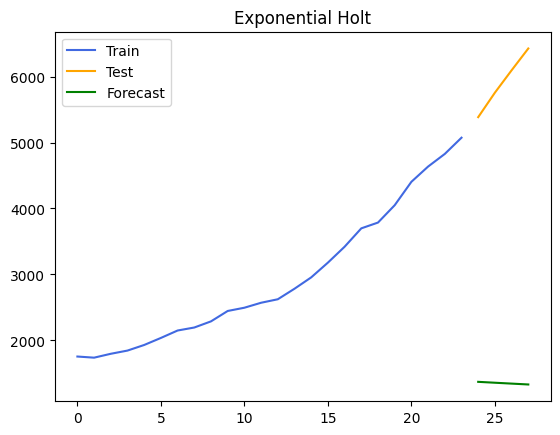

{'smoothing_level': 0.0, 'smoothing_trend': 0.4, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 4582.817030454722


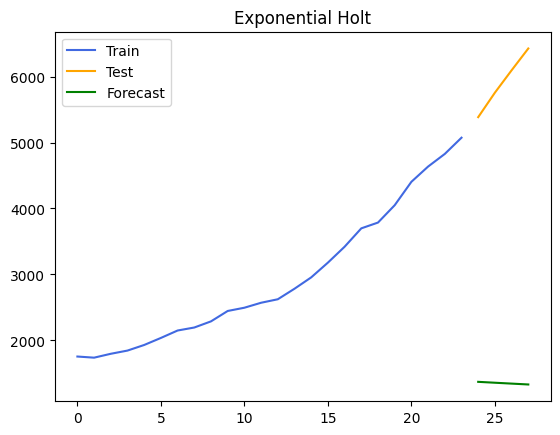

{'smoothing_level': 0.0, 'smoothing_trend': 0.5, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 4582.817030454715


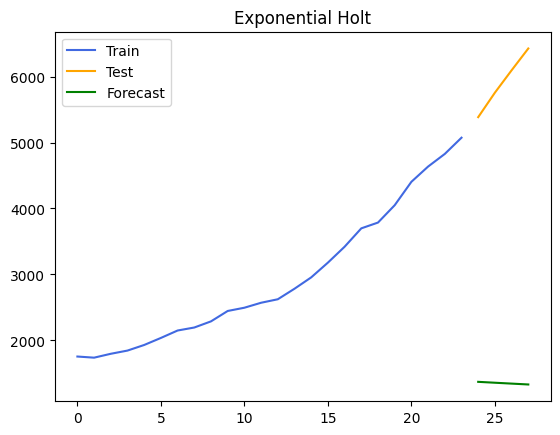

{'smoothing_level': 0.0, 'smoothing_trend': 0.6000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 4582.817030454725


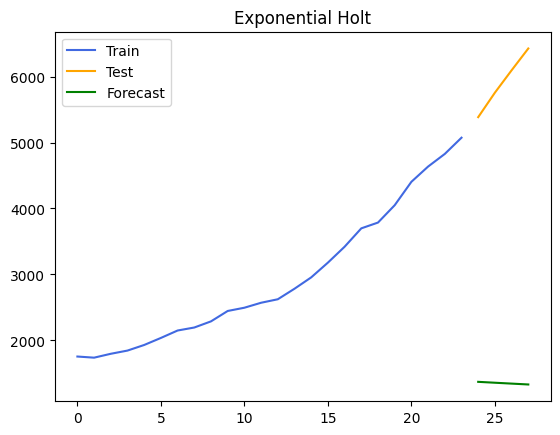

{'smoothing_level': 0.0, 'smoothing_trend': 0.7000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 4582.817030454722


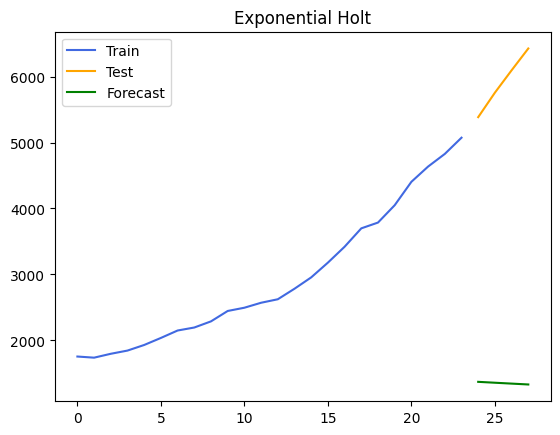

{'smoothing_level': 0.0, 'smoothing_trend': 0.8, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 4582.817030454714


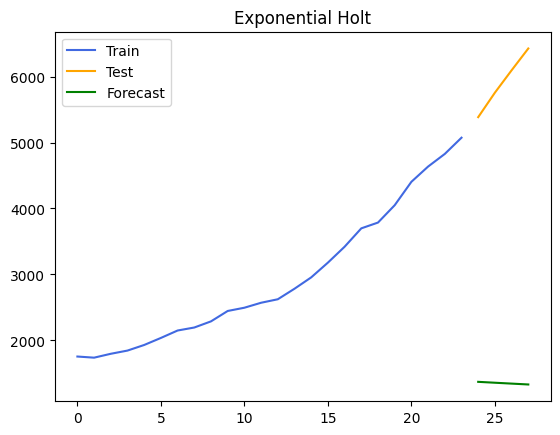

{'smoothing_level': 0.0, 'smoothing_trend': 0.9, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 4582.817030454714


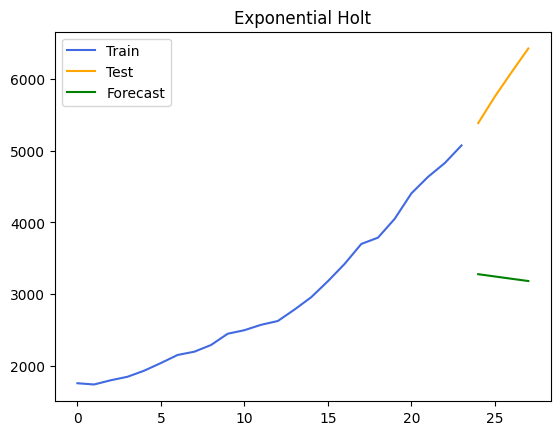

{'smoothing_level': 0.1, 'smoothing_trend': 0.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 2720.2000330631663


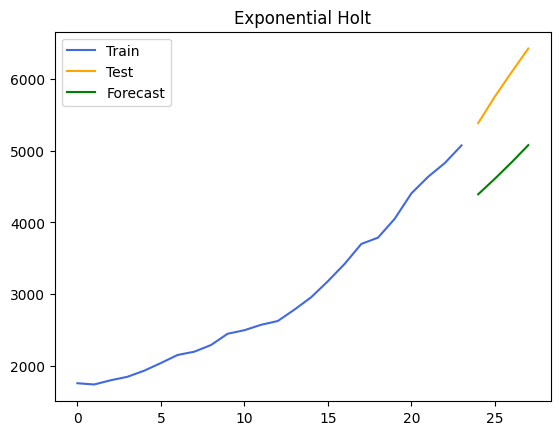

{'smoothing_level': 0.1, 'smoothing_trend': 0.1, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 1194.1396748221437


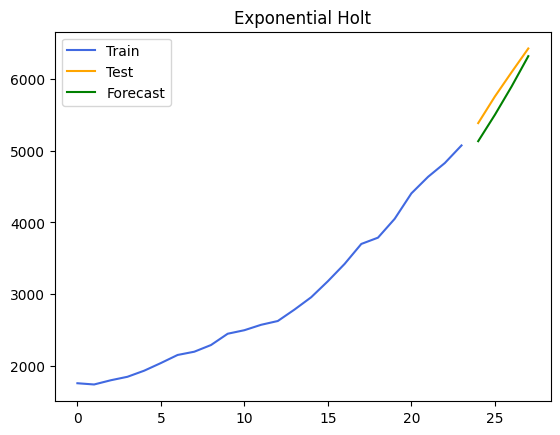

{'smoothing_level': 0.1, 'smoothing_trend': 0.2, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 212.27714057268653


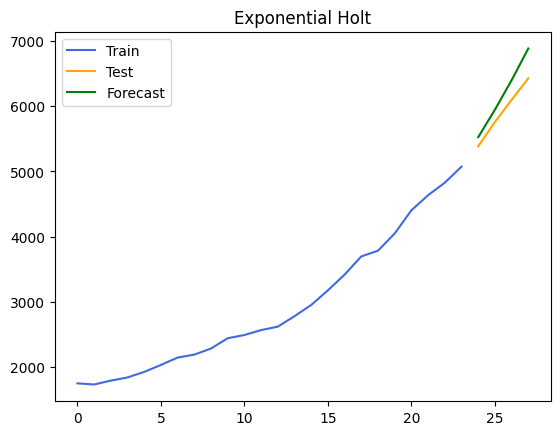

{'smoothing_level': 0.1, 'smoothing_trend': 0.30000000000000004, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 297.41309230843814


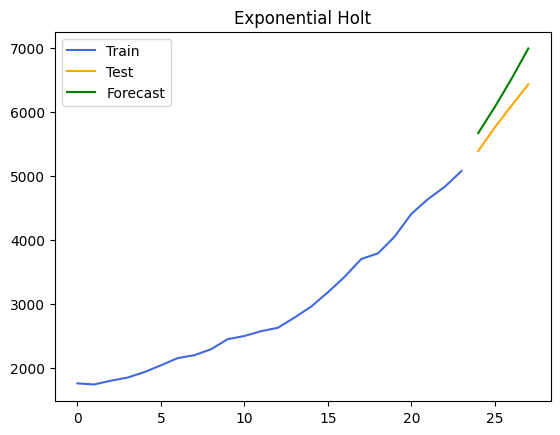

{'smoothing_level': 0.1, 'smoothing_trend': 0.4, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 410.17325630809694


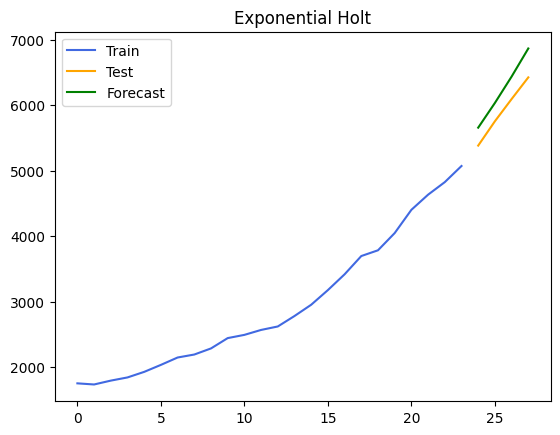

{'smoothing_level': 0.1, 'smoothing_trend': 0.5, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 341.2105554654994


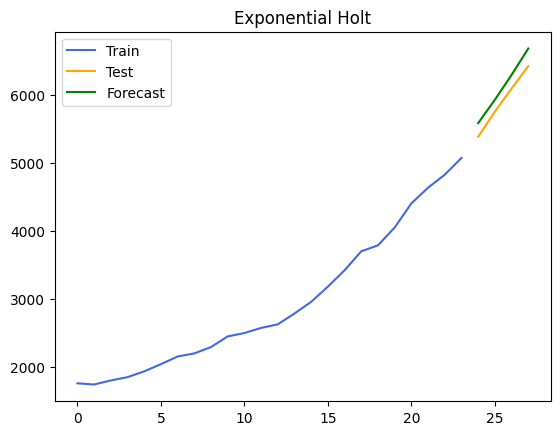

{'smoothing_level': 0.1, 'smoothing_trend': 0.6000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 211.11712326153588


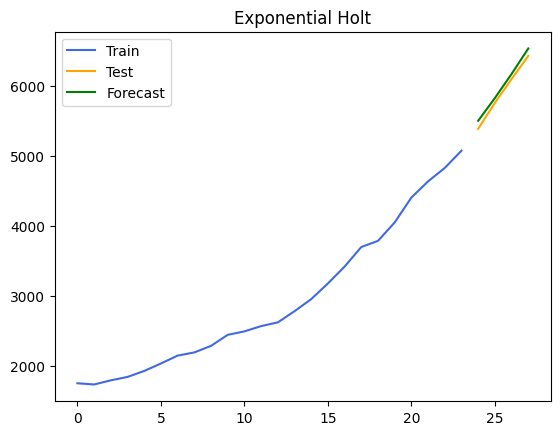

{'smoothing_level': 0.1, 'smoothing_trend': 0.7000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 92.42507530431145


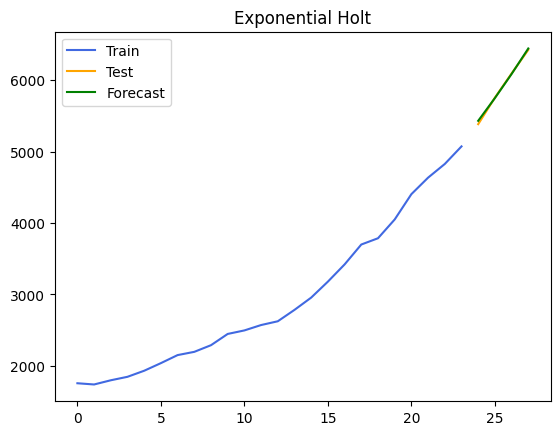

{'smoothing_level': 0.1, 'smoothing_trend': 0.8, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 25.72603152506908


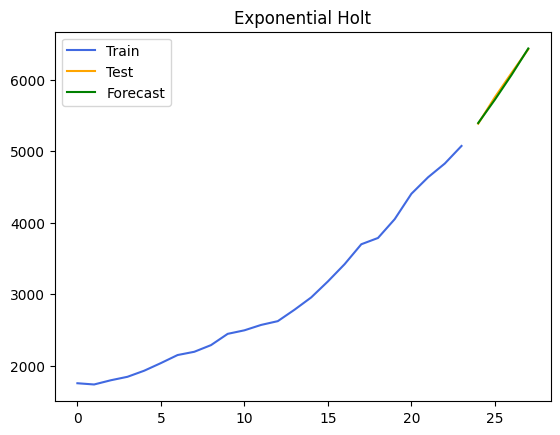

{'smoothing_level': 0.1, 'smoothing_trend': 0.9, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 23.213935274934805


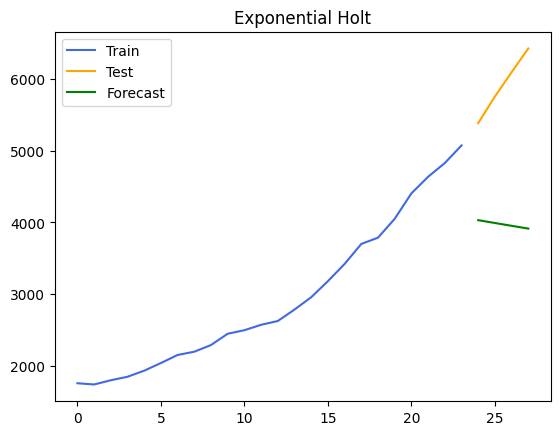

{'smoothing_level': 0.2, 'smoothing_trend': 0.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 1991.5754054369686


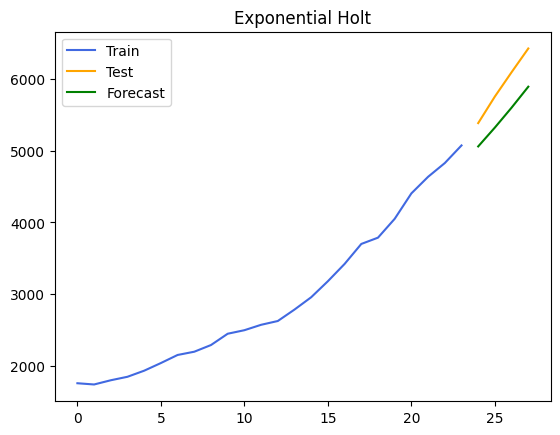

{'smoothing_level': 0.2, 'smoothing_trend': 0.1, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 453.48341685020915


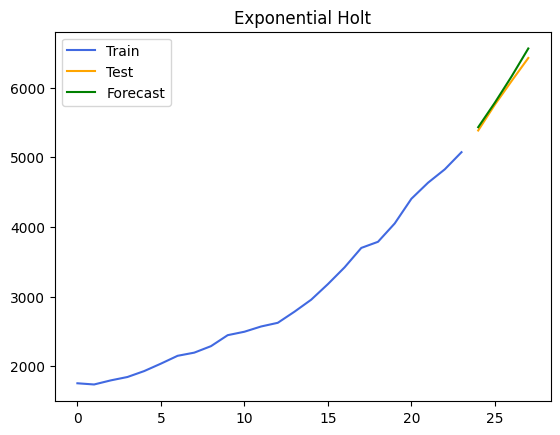

{'smoothing_level': 0.2, 'smoothing_trend': 0.2, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 80.62161428824376


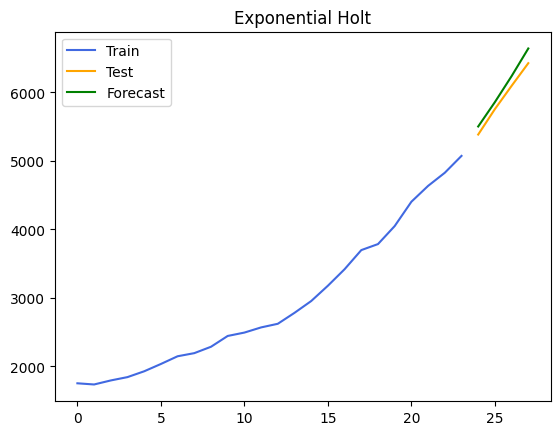

{'smoothing_level': 0.2, 'smoothing_trend': 0.30000000000000004, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 150.43973908849807


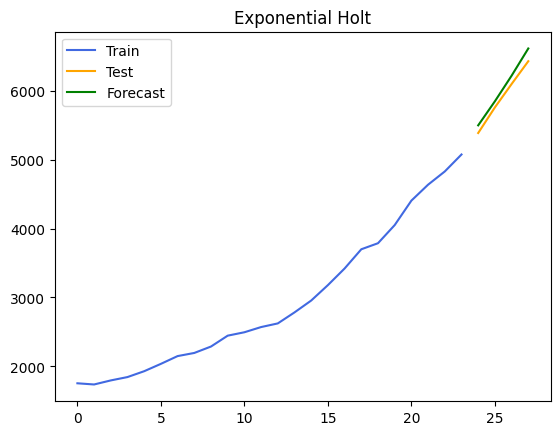

{'smoothing_level': 0.2, 'smoothing_trend': 0.4, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 131.28425832434007


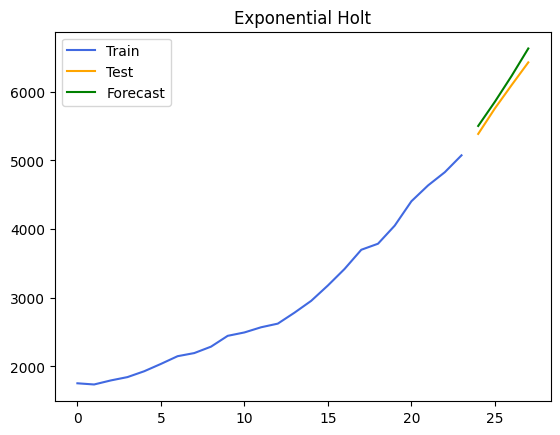

{'smoothing_level': 0.2, 'smoothing_trend': 0.5, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 142.97768722684944


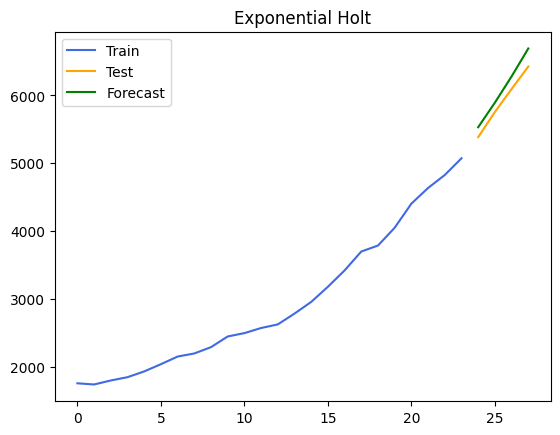

{'smoothing_level': 0.2, 'smoothing_trend': 0.6000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 191.0413226347288


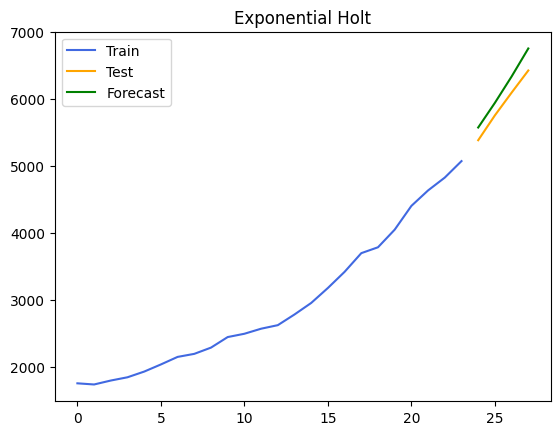

{'smoothing_level': 0.2, 'smoothing_trend': 0.7000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 243.50085903418446


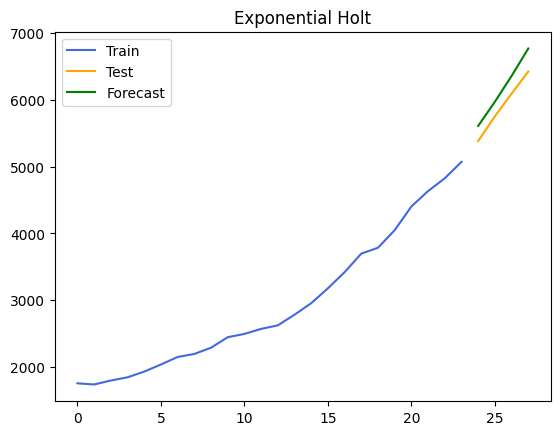

{'smoothing_level': 0.2, 'smoothing_trend': 0.8, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 268.7453141262503


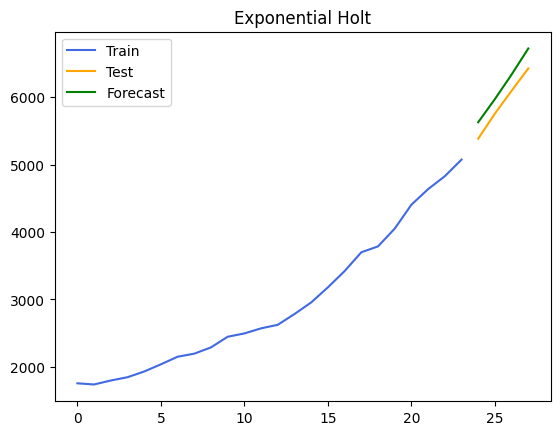

{'smoothing_level': 0.2, 'smoothing_trend': 0.9, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 250.65013536173515


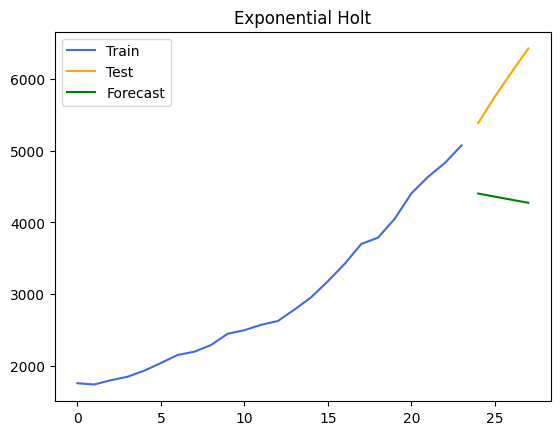

{'smoothing_level': 0.30000000000000004, 'smoothing_trend': 0.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 1637.4595637701009


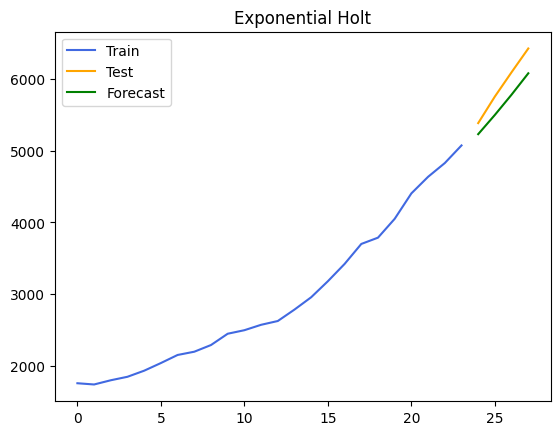

{'smoothing_level': 0.30000000000000004, 'smoothing_trend': 0.1, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 277.3042296203932


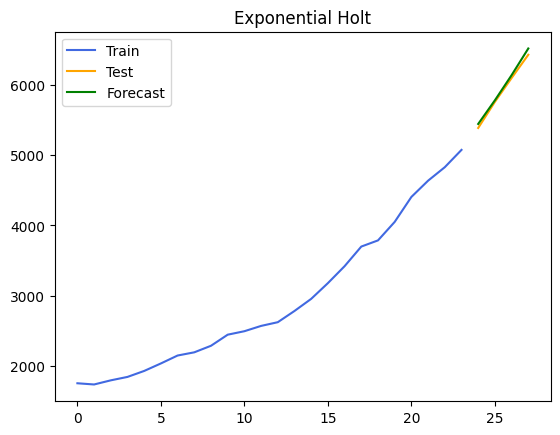

{'smoothing_level': 0.30000000000000004, 'smoothing_trend': 0.2, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 57.75416848800037


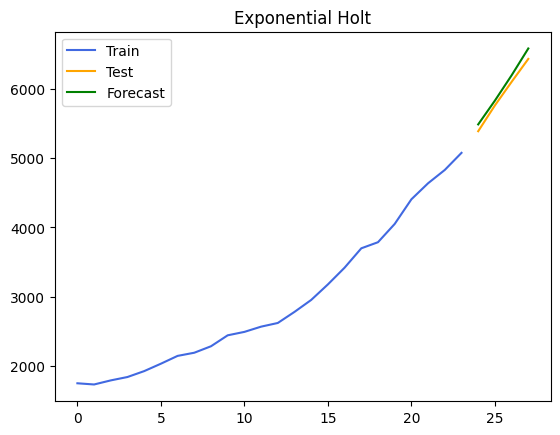

{'smoothing_level': 0.30000000000000004, 'smoothing_trend': 0.30000000000000004, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 107.06322965596951


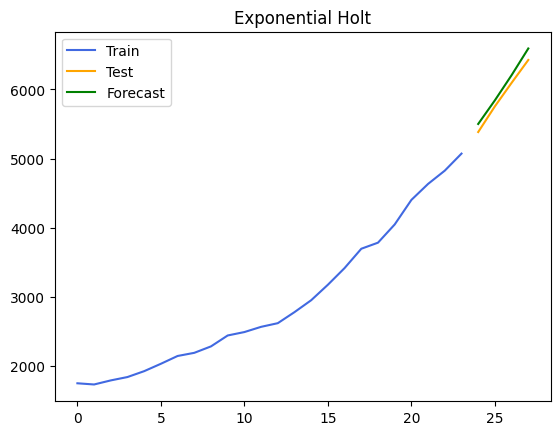

{'smoothing_level': 0.30000000000000004, 'smoothing_trend': 0.4, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 123.54280119714531


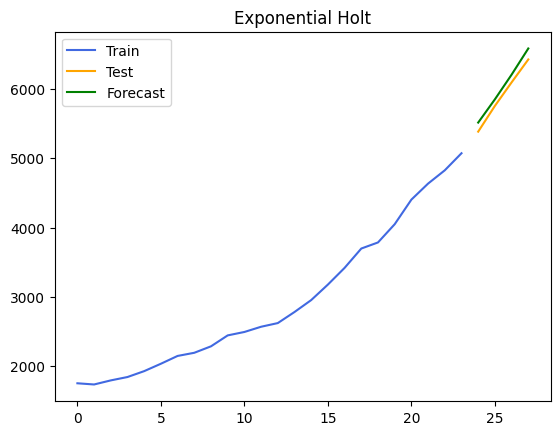

{'smoothing_level': 0.30000000000000004, 'smoothing_trend': 0.5, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 126.0480584383762


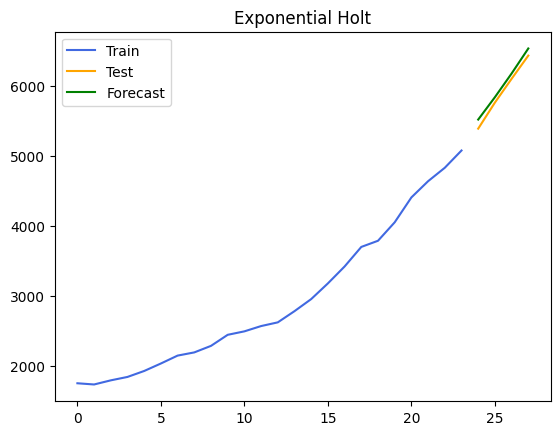

{'smoothing_level': 0.30000000000000004, 'smoothing_trend': 0.6000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 98.36996279271095


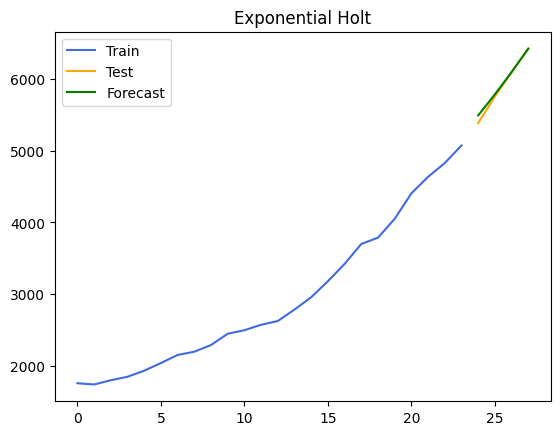

{'smoothing_level': 0.30000000000000004, 'smoothing_trend': 0.7000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 55.975761680417875


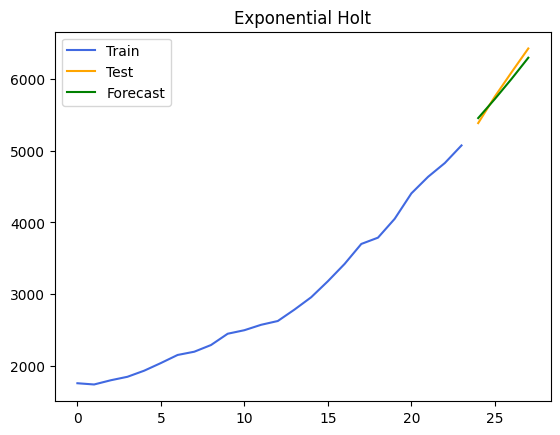

{'smoothing_level': 0.30000000000000004, 'smoothing_trend': 0.8, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 88.45513761213086


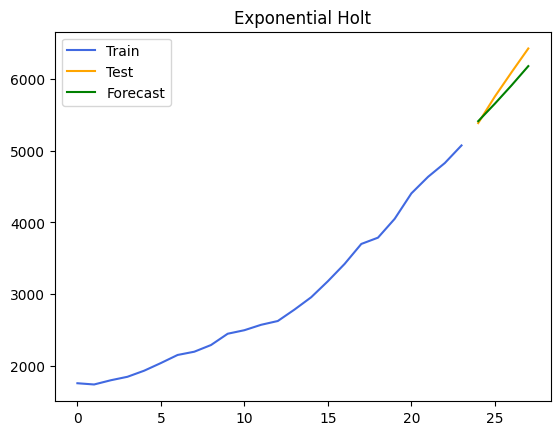

{'smoothing_level': 0.30000000000000004, 'smoothing_trend': 0.9, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 161.79621812643643


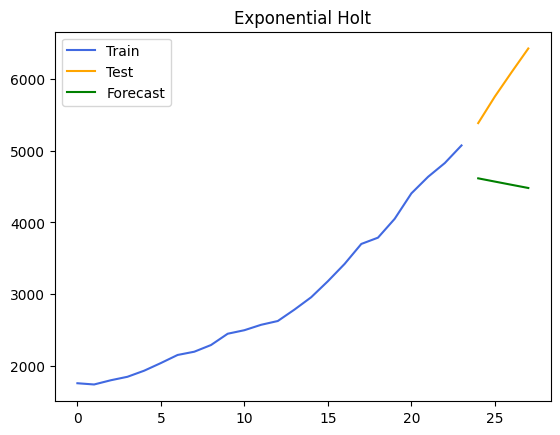

{'smoothing_level': 0.4, 'smoothing_trend': 0.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 1437.4470975618742


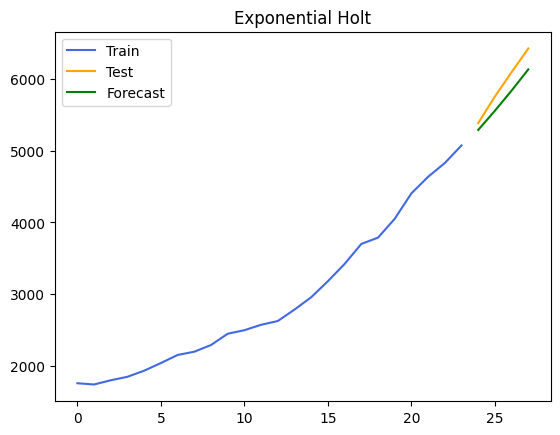

{'smoothing_level': 0.4, 'smoothing_trend': 0.1, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 223.55374471196228


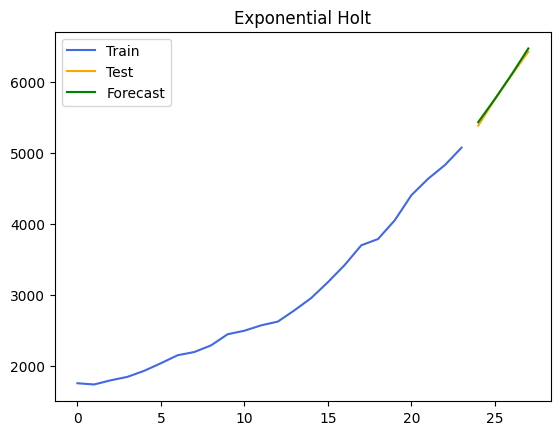

{'smoothing_level': 0.4, 'smoothing_trend': 0.2, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 33.36439476961486


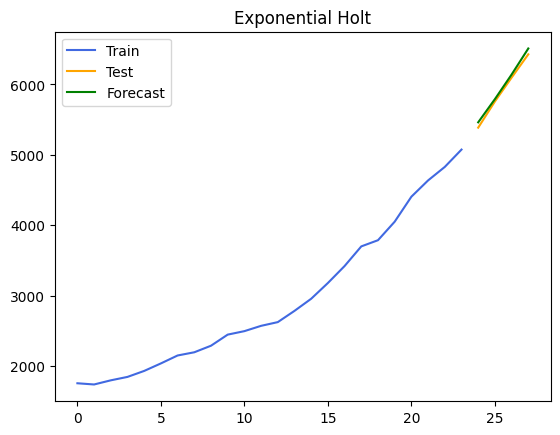

{'smoothing_level': 0.4, 'smoothing_trend': 0.30000000000000004, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 62.432830384216835


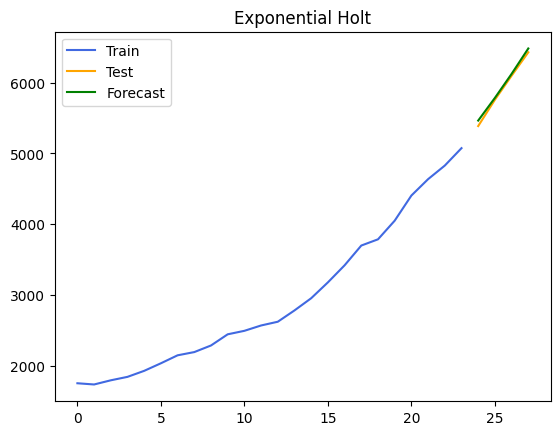

{'smoothing_level': 0.4, 'smoothing_trend': 0.4, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 50.67649732082415


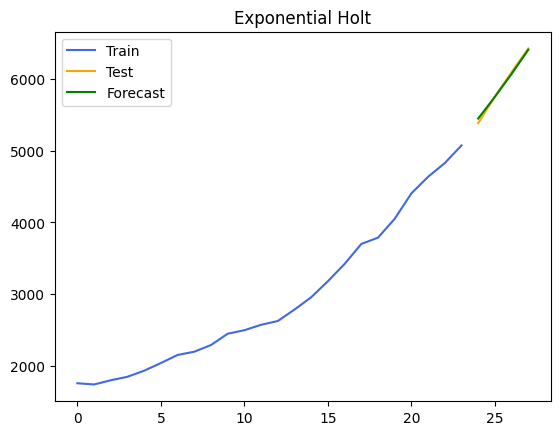

{'smoothing_level': 0.4, 'smoothing_trend': 0.5, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 35.121274218724544


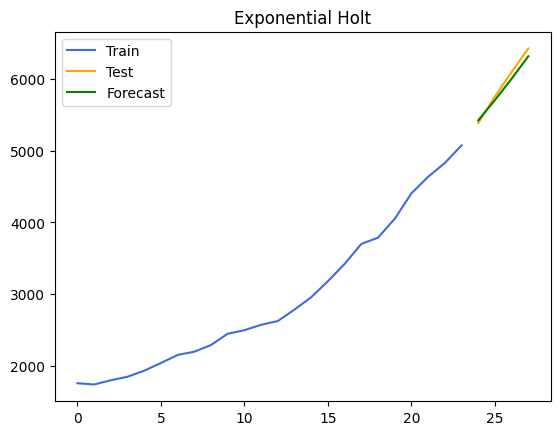

{'smoothing_level': 0.4, 'smoothing_trend': 0.6000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 77.84974592600747


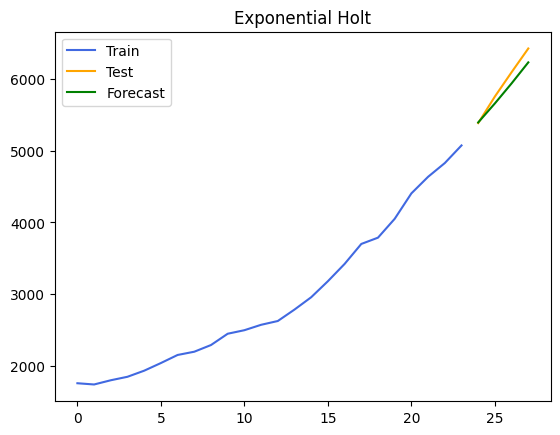

{'smoothing_level': 0.4, 'smoothing_trend': 0.7000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 133.55952173600917


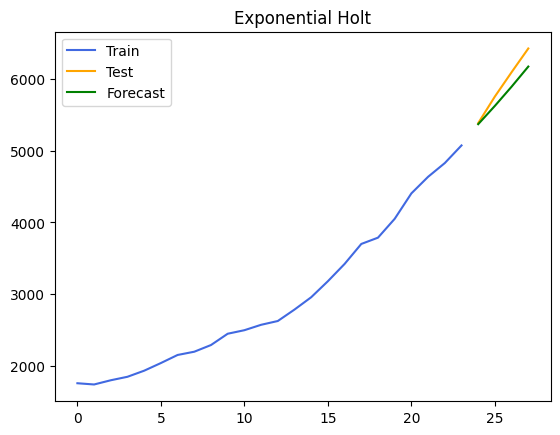

{'smoothing_level': 0.4, 'smoothing_trend': 0.8, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 174.5099857826812


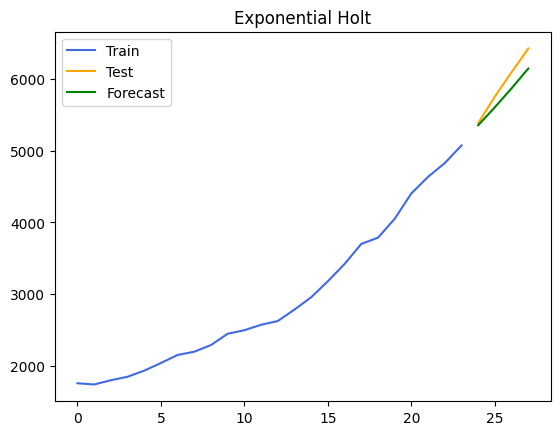

{'smoothing_level': 0.4, 'smoothing_trend': 0.9, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 194.8817411569101


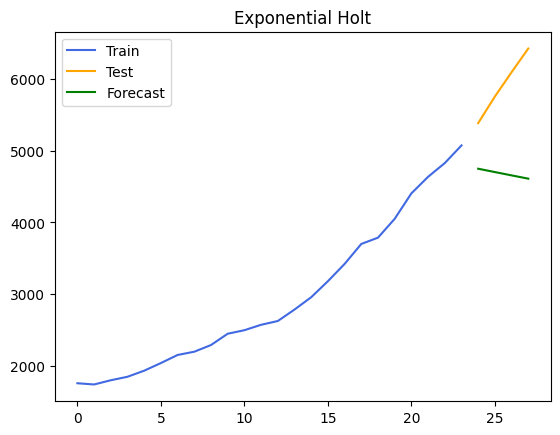

{'smoothing_level': 0.5, 'smoothing_trend': 0.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 1312.6538646399013


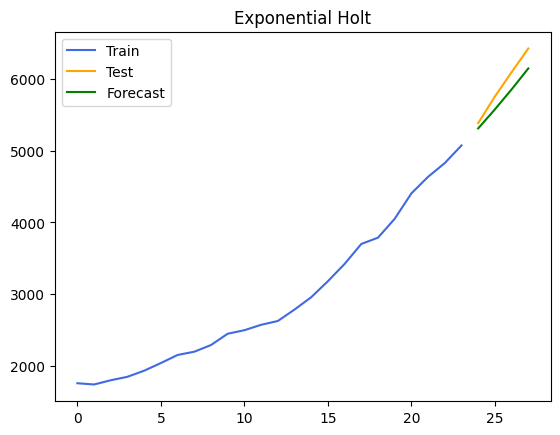

{'smoothing_level': 0.5, 'smoothing_trend': 0.1, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 207.96027023975975


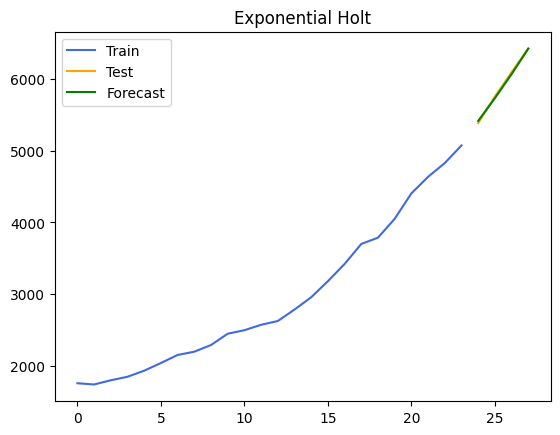

{'smoothing_level': 0.5, 'smoothing_trend': 0.2, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 23.517585743508274


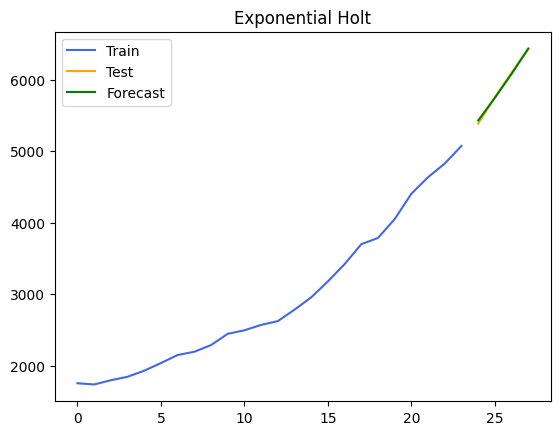

{'smoothing_level': 0.5, 'smoothing_trend': 0.30000000000000004, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 24.224987260322493


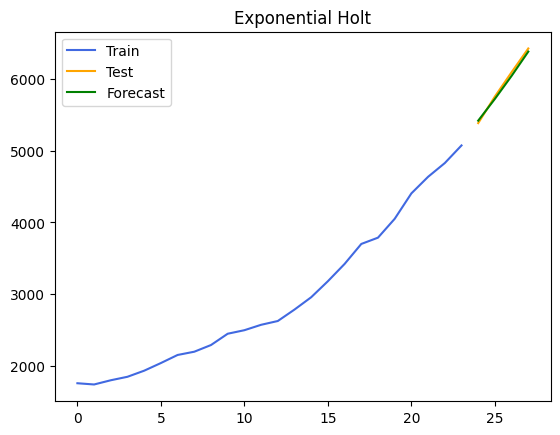

{'smoothing_level': 0.5, 'smoothing_trend': 0.4, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 41.217038249323814


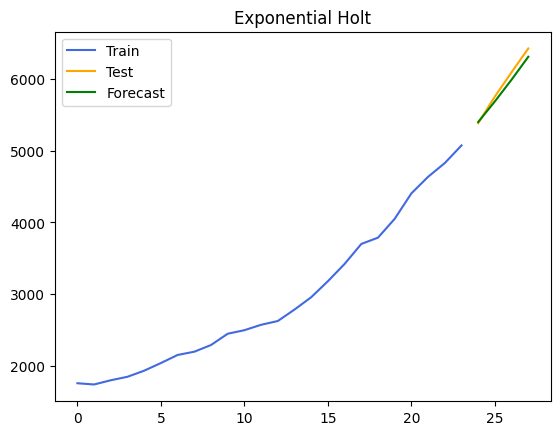

{'smoothing_level': 0.5, 'smoothing_trend': 0.5, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 85.29495235737392


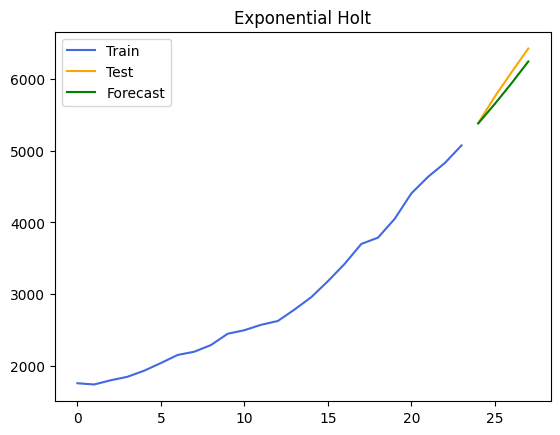

{'smoothing_level': 0.5, 'smoothing_trend': 0.6000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 129.31319834403823


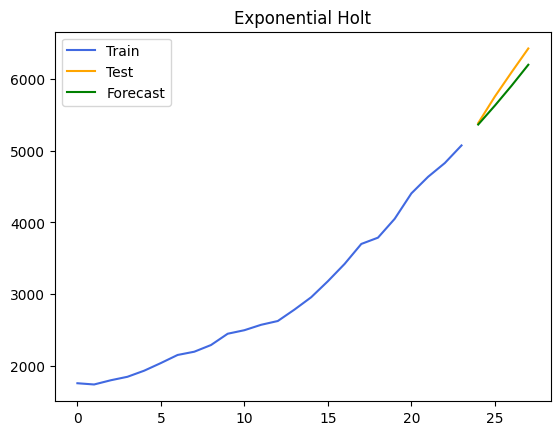

{'smoothing_level': 0.5, 'smoothing_trend': 0.7000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 160.84541329573844


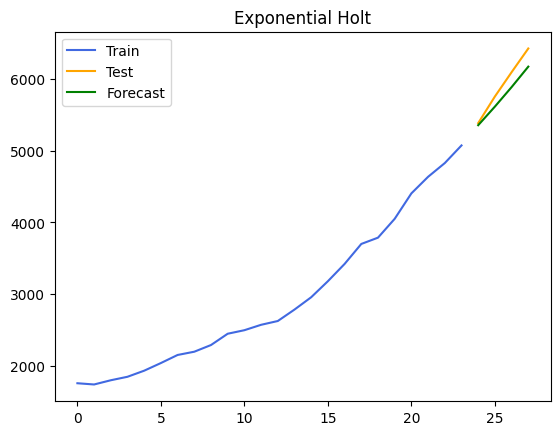

{'smoothing_level': 0.5, 'smoothing_trend': 0.8, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 179.05778292882567


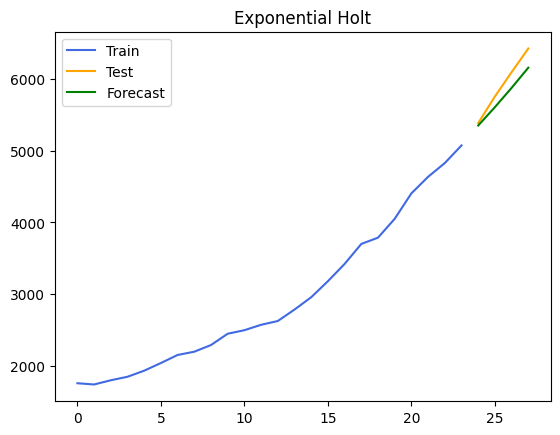

{'smoothing_level': 0.5, 'smoothing_trend': 0.9, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 189.13910011535725


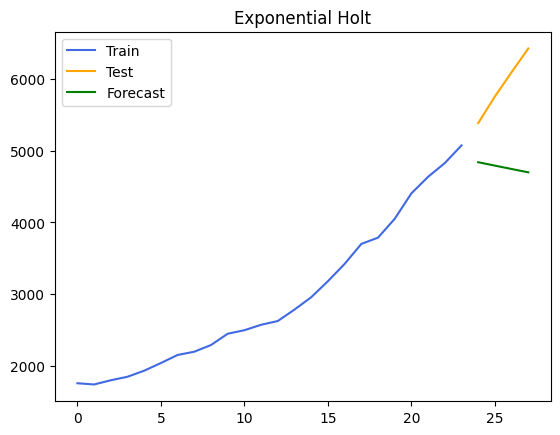

{'smoothing_level': 0.6000000000000001, 'smoothing_trend': 0.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 1228.9802139824187


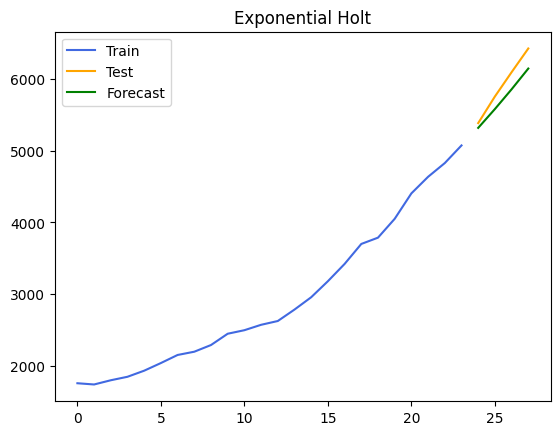

{'smoothing_level': 0.6000000000000001, 'smoothing_trend': 0.1, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 206.4240823214805


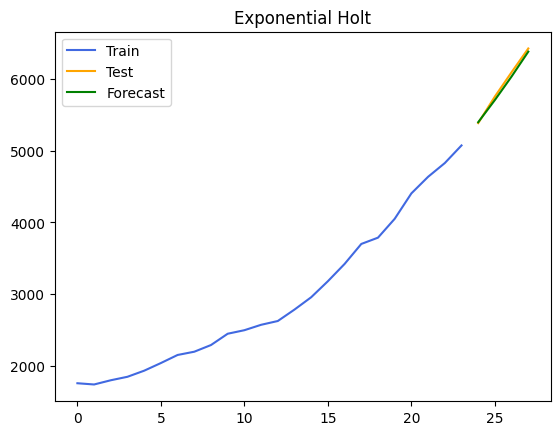

{'smoothing_level': 0.6000000000000001, 'smoothing_trend': 0.2, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 44.939988697847404


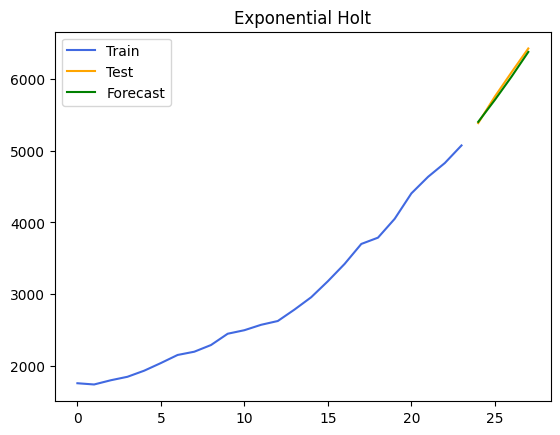

{'smoothing_level': 0.6000000000000001, 'smoothing_trend': 0.30000000000000004, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 46.166813709304314


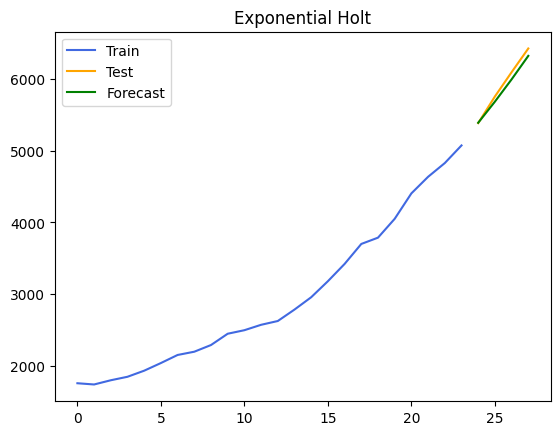

{'smoothing_level': 0.6000000000000001, 'smoothing_trend': 0.4, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 80.41326311401008


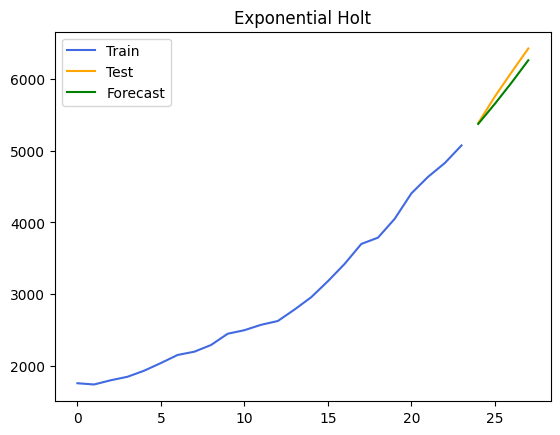

{'smoothing_level': 0.6000000000000001, 'smoothing_trend': 0.5, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 120.92877644352234


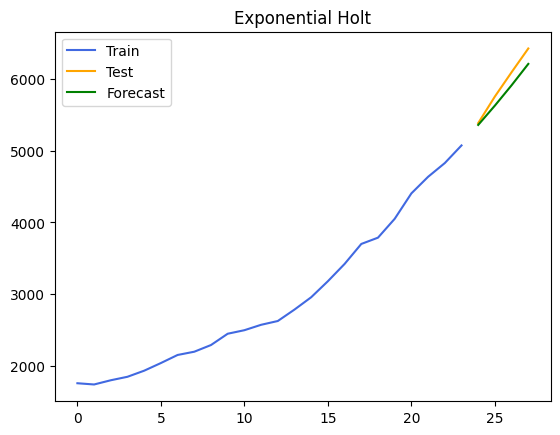

{'smoothing_level': 0.6000000000000001, 'smoothing_trend': 0.6000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 155.1864980881923


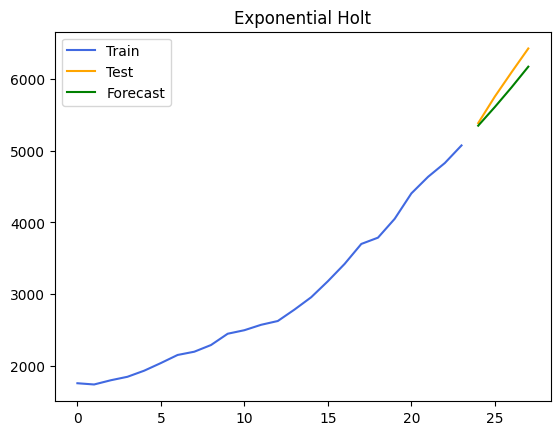

{'smoothing_level': 0.6000000000000001, 'smoothing_trend': 0.7000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 181.2890214770845


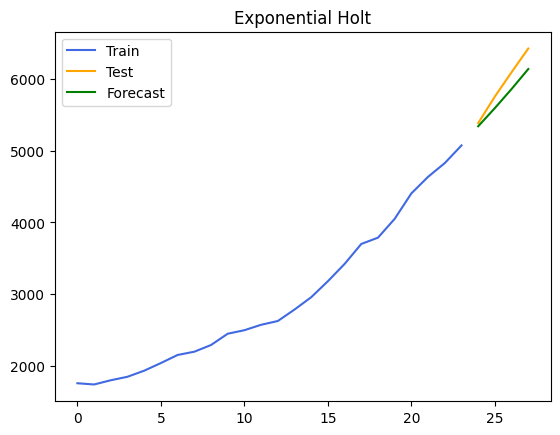

{'smoothing_level': 0.6000000000000001, 'smoothing_trend': 0.8, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 203.04537924074714


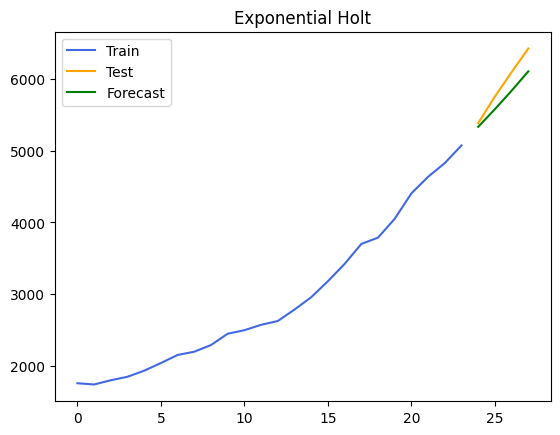

{'smoothing_level': 0.6000000000000001, 'smoothing_trend': 0.9, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 225.22778608108507


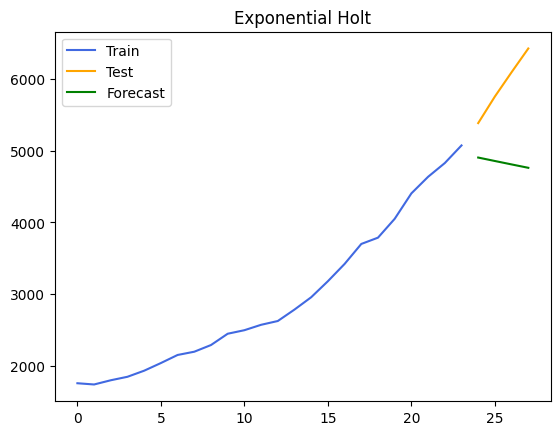

{'smoothing_level': 0.7000000000000001, 'smoothing_trend': 0.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 1169.5680276602338


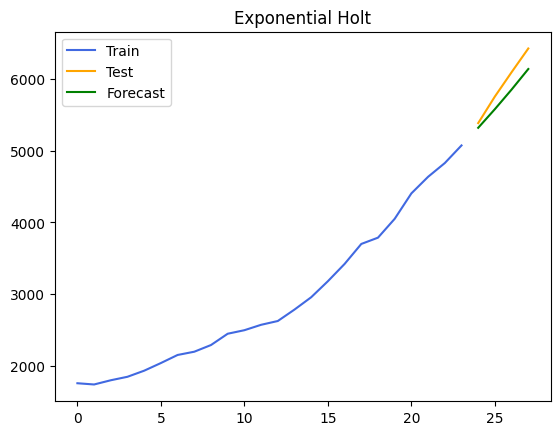

{'smoothing_level': 0.7000000000000001, 'smoothing_trend': 0.1, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 209.8372597438013


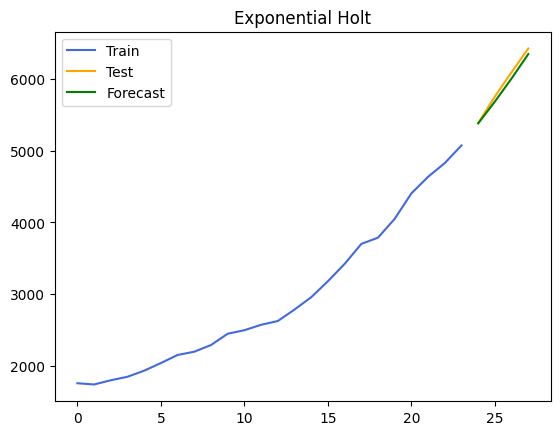

{'smoothing_level': 0.7000000000000001, 'smoothing_trend': 0.2, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 68.29032592575


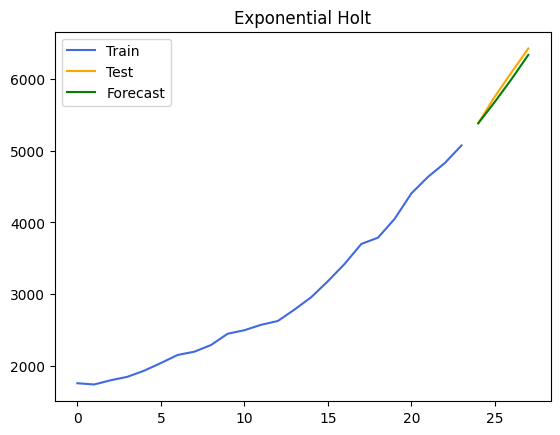

{'smoothing_level': 0.7000000000000001, 'smoothing_trend': 0.30000000000000004, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 74.73015565195699


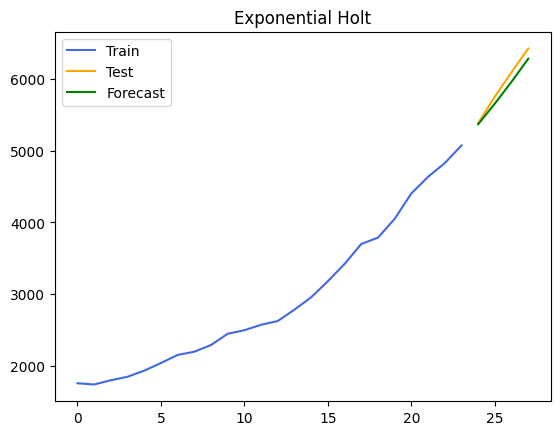

{'smoothing_level': 0.7000000000000001, 'smoothing_trend': 0.4, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 109.23604095316111


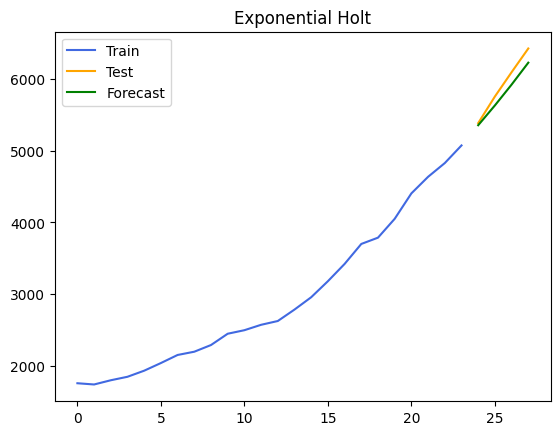

{'smoothing_level': 0.7000000000000001, 'smoothing_trend': 0.5, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 146.2801342090894


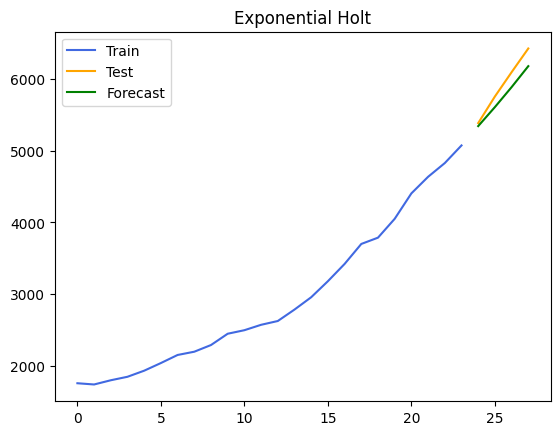

{'smoothing_level': 0.7000000000000001, 'smoothing_trend': 0.6000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 178.81249390424546


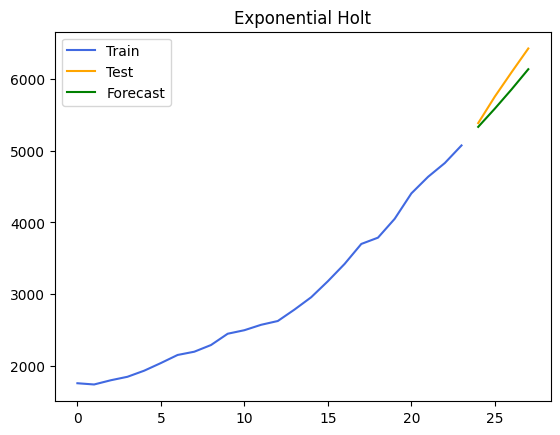

{'smoothing_level': 0.7000000000000001, 'smoothing_trend': 0.7000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 207.4682457366261


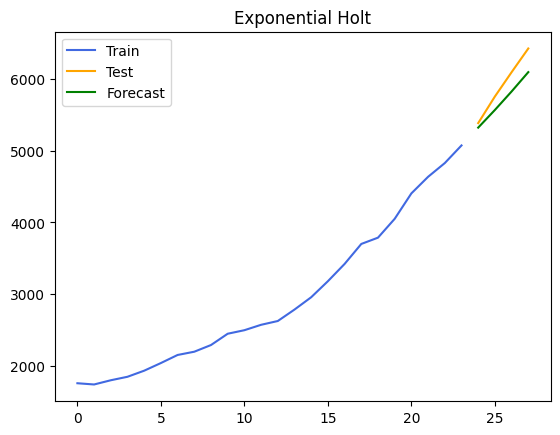

{'smoothing_level': 0.7000000000000001, 'smoothing_trend': 0.8, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 234.84598325828674


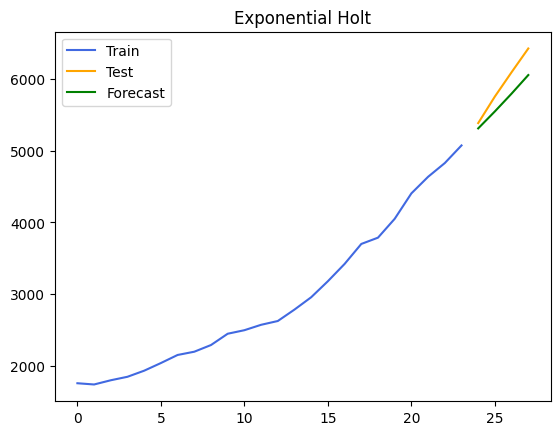

{'smoothing_level': 0.7000000000000001, 'smoothing_trend': 0.9, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 262.3813501874076


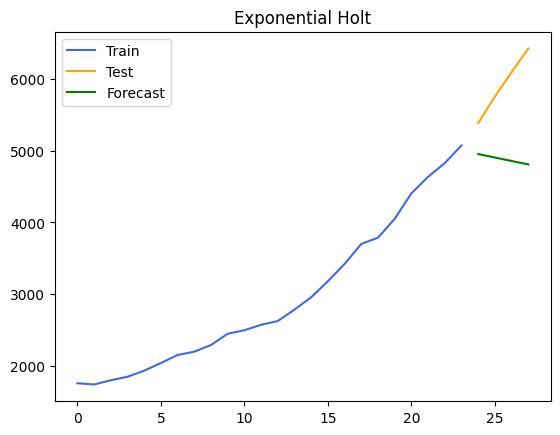

{'smoothing_level': 0.8, 'smoothing_trend': 0.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 1125.218432595845


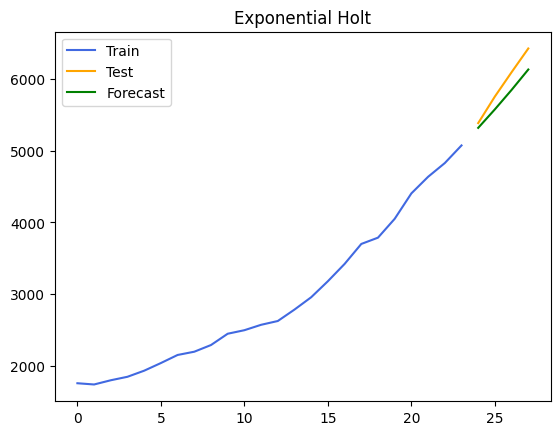

{'smoothing_level': 0.8, 'smoothing_trend': 0.1, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 214.26343500763758


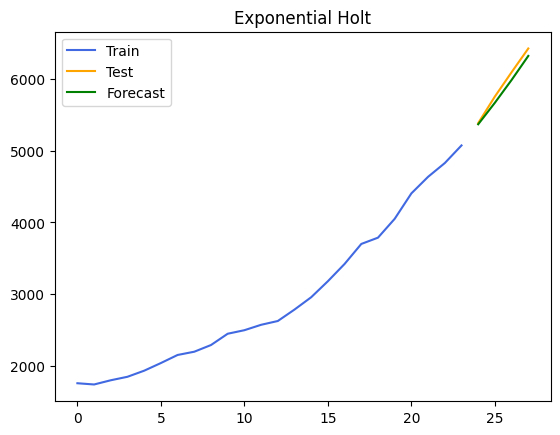

{'smoothing_level': 0.8, 'smoothing_trend': 0.2, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 87.09510715828443


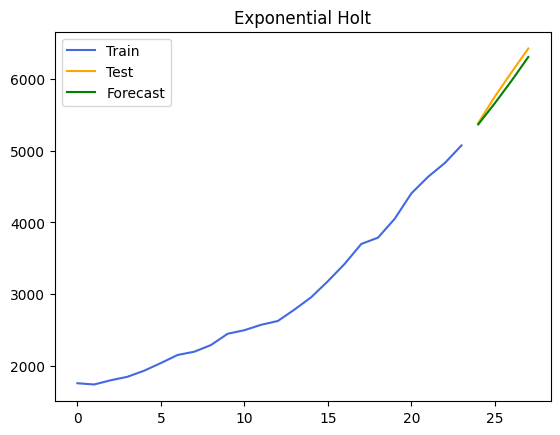

{'smoothing_level': 0.8, 'smoothing_trend': 0.30000000000000004, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 96.16309583814297


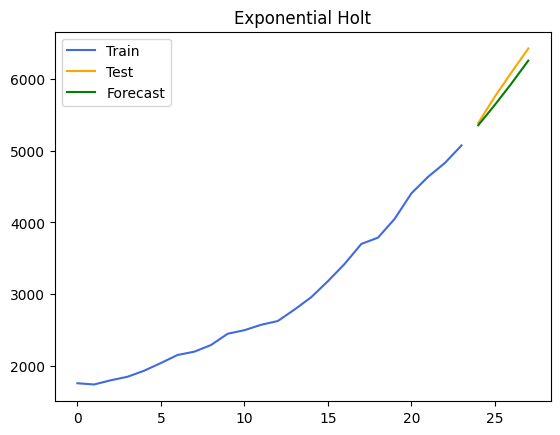

{'smoothing_level': 0.8, 'smoothing_trend': 0.4, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 129.4123535470003


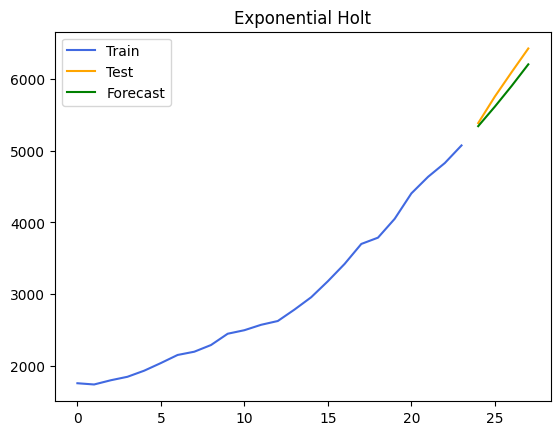

{'smoothing_level': 0.8, 'smoothing_trend': 0.5, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 164.161709985999


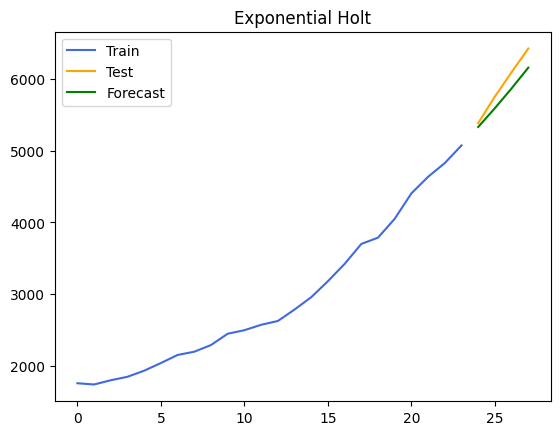

{'smoothing_level': 0.8, 'smoothing_trend': 0.6000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 195.1978684331708


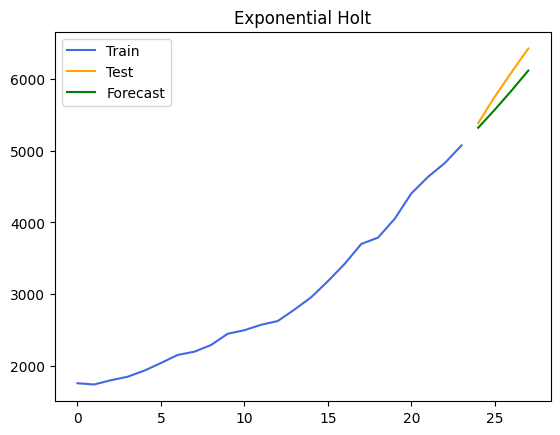

{'smoothing_level': 0.8, 'smoothing_trend': 0.7000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 222.3831362992675


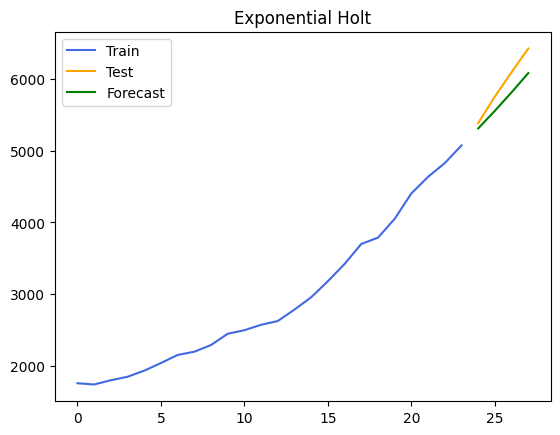

{'smoothing_level': 0.8, 'smoothing_trend': 0.8, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 245.91926604261792


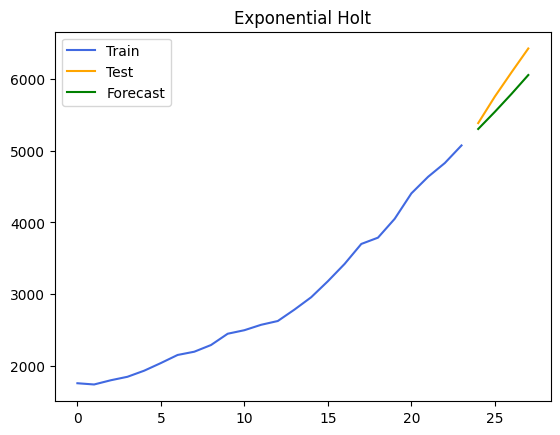

{'smoothing_level': 0.8, 'smoothing_trend': 0.9, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 264.8168469627255


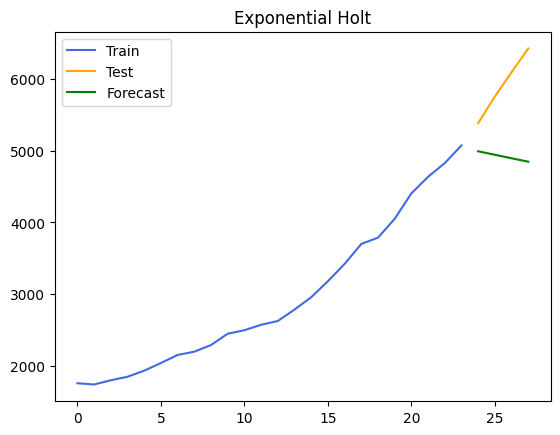

{'smoothing_level': 0.9, 'smoothing_trend': 0.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 1090.5274536322831


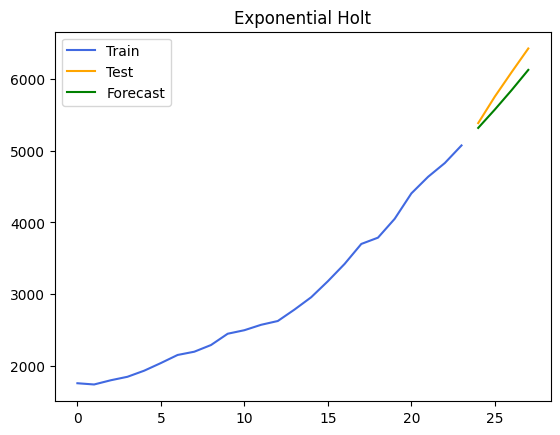

{'smoothing_level': 0.9, 'smoothing_trend': 0.1, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 217.7445976756808


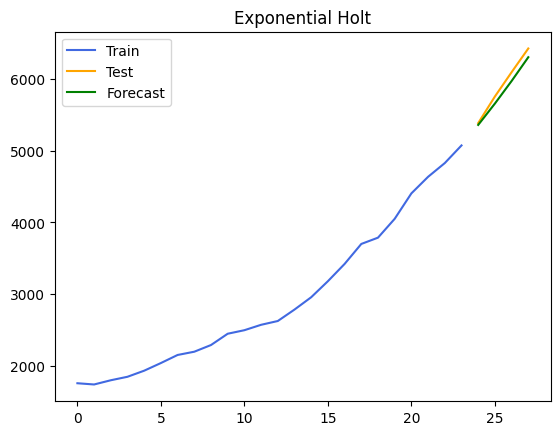

{'smoothing_level': 0.9, 'smoothing_trend': 0.2, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 100.47394328923026


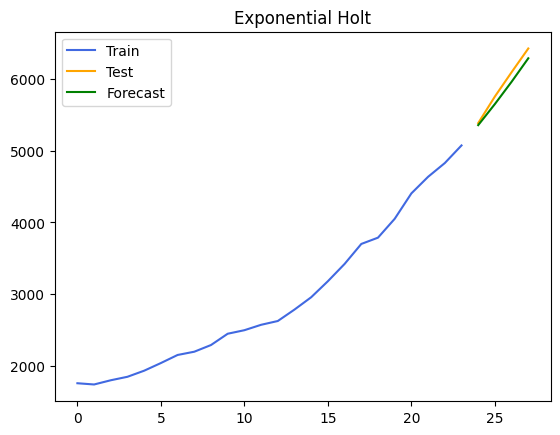

{'smoothing_level': 0.9, 'smoothing_trend': 0.30000000000000004, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 109.9922248327797


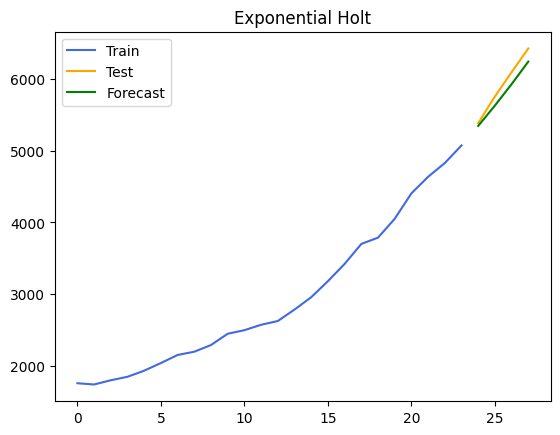

{'smoothing_level': 0.9, 'smoothing_trend': 0.4, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 140.5377815455233


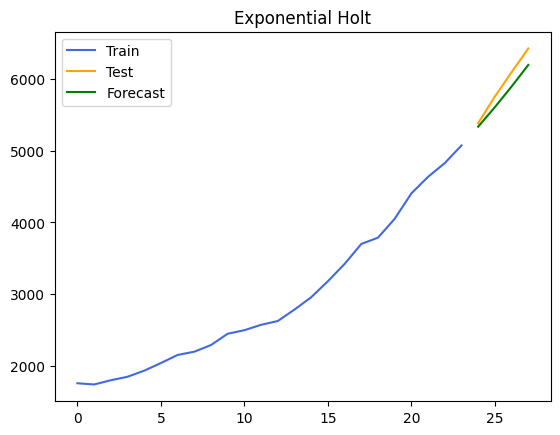

{'smoothing_level': 0.9, 'smoothing_trend': 0.5, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 171.19062596883305


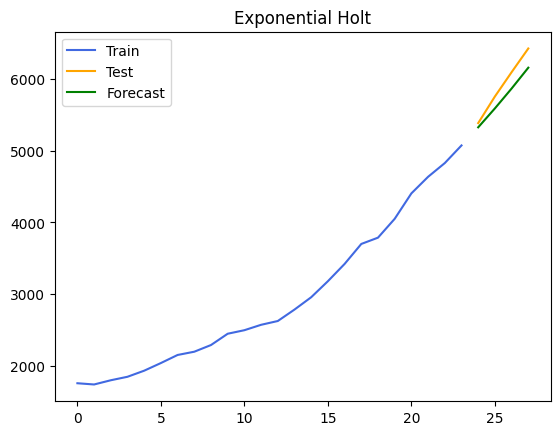

{'smoothing_level': 0.9, 'smoothing_trend': 0.6000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 196.85690467398908


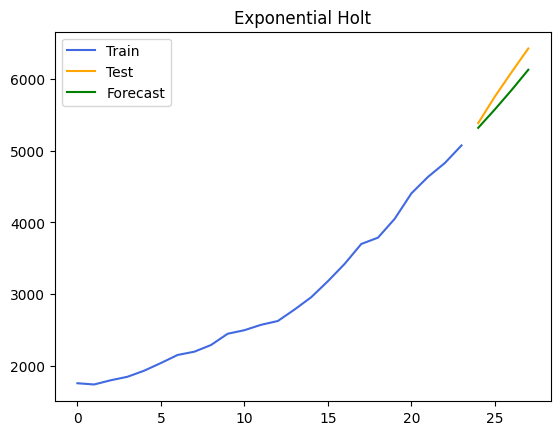

{'smoothing_level': 0.9, 'smoothing_trend': 0.7000000000000001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 216.2455418350619


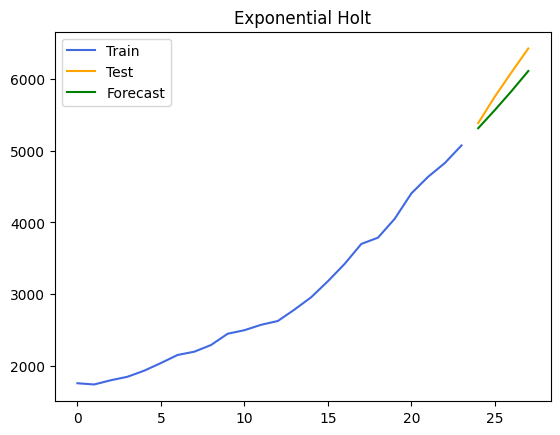

{'smoothing_level': 0.9, 'smoothing_trend': 0.8, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 228.4006545266948


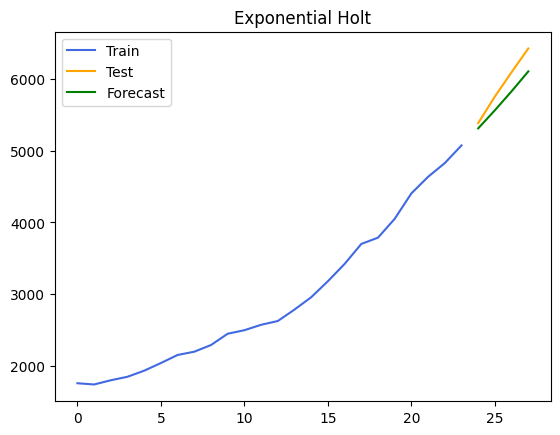

{'smoothing_level': 0.9, 'smoothing_trend': 0.9, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[1 1]: 232.15080067789305


In [35]:
lst = []
def solve(alpha, beta):
    for a in np.arange(0, alpha, 0.1):
        for b in np.arange(0, beta, 0.1):
            holt = Holt(y_trn_gdp, exponential=True)
            fit1 = holt.fit(smoothing_level = a, smoothing_trend = b)

            fcast1 = fit1.forecast(len(y_tes_gdp))

            y_trn_gdp.plot(color= 'royalblue', label = 'Train')
            y_tes_gdp.plot(color= 'orange', label = 'Test')
            fcast1.plot(color= 'green', label = 'Forecast')
            plt.legend(loc = 'best')
            plt.title('Exponential Holt')
            plt.show()

            print(fit1.params)
            res = sqrt(mean_squared_error(y_tes_gdp, fcast1))
            print(f"[{alpha} {beta}]: {res}")
            lst.append(res)

solve(1,1)


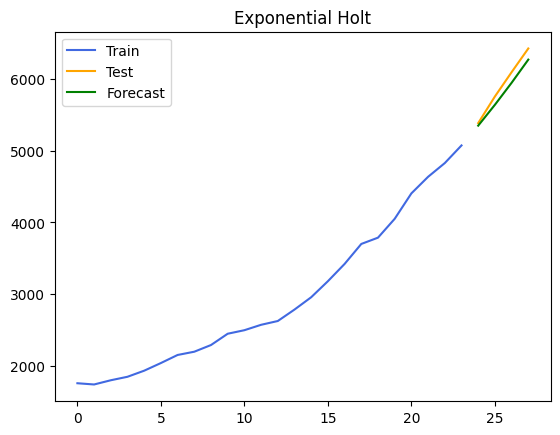

{'smoothing_level': 0.9949669729679247, 'smoothing_trend': 0.32834308081389707, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1754.857, 'initial_trend': 0.9901746979953353, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
123.25945802896723


In [33]:


from math import sqrt
from statsmodels.tsa.api import Holt

holt = Holt(y_trn_gdp, exponential=True)
fit1 = holt.fit()

fcast1 = fit1.forecast(len(y_tes_gdp))

y_trn_gdp.plot(color= 'royalblue', label = 'Train')
y_tes_gdp.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')
plt.legend(loc = 'best')
plt.title('Exponential Holt')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_tes_gdp, fcast1))
print(res)

In [36]:
res

AttributeError: 'float' object has no attribute 'min'

In [40]:
np.min(lst)

23.213935274934805